<a href="https://colab.research.google.com/github/Mgll3/SO-Lab3-20241/blob/main/SO_Lab3_20241.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introducción**


El objetivo de este informe es evaluar el rendimiento de la versión paralela del programa SAXPY (single-precision A*X plus Y) mediante la implementación de una estrategia de paralelización por datos. El programa realiza una operación iterativa saxpy, que consiste en multiplicar un valor escalar por un vector y luego sumar el resultado a otro vector. Esta operación se repite un número máximo de veces especificado por el usuario.

En este informe, analizaremos cómo varía el tiempo de ejecución del [programa implementado](https://github.com/Mgll3/SO-Lab3-20241/) cuando se ejecuta con diferentes números de hilos. Realizaremos múltiples repeticiones para cada configuración de hilos y registramos el tiempo de ejecución para cada repetición. Luego, presentaremos los resultados en forma de tablas y gráficos, y analizaremos las tendencias observadas.


# **Metodología**



Para evaluar el rendimiento de la versión paralela del programa SAXPY, hemos modificado el código para permitir la ejecución de múltiples repeticiones y registrar el tiempo de ejecución para cada configuración de hilos. Utilizaremos la función pthread_create para crear los hilos necesarios y mediremos el tiempo de ejecución utilizando la función gettimeofday.

Ejecutaremos el programa con diferentes números de hilos, incluidos 1, 2, 4 y 8 hilos. Realizaremos un mínimo de 10 repeticiones para cada configuración de hilos. Registramos el tiempo de ejecución para cada repetición y calcularemos el tiempo promedio de ejecución para cada configuración de hilos.

# **Resultados**



En cada una de las listas se almacenan los resultados obtenidos en la ejecuión con N Hilos. luego se calcula el promedio de ejecución para cada lista y finalmente se grafica el execution time frente a N # de Hilos.



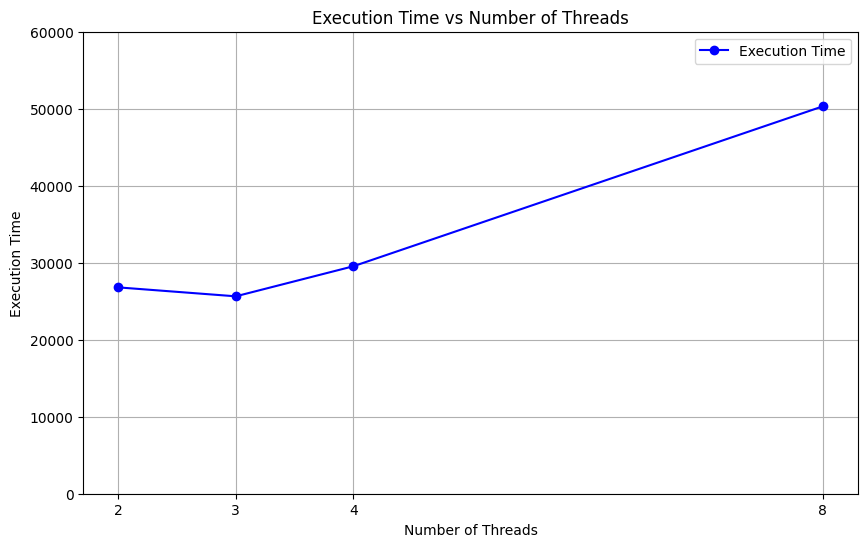

In [ ]:
import matplotlib.pyplot as plt

N2 = [
  25345.911,
  26064.985,
  27080.405,
  28221.131,
  27013.432,
  25488.417,
  28862.623,
  26601.867,
  27403.26,
  25881.764
]

N3 = [
  25453.286,
  25544.321,
  25328.693,
  26987.825,
  25916.857,
  25765.252,
  25153.875,
  25348.182,
  25436.237,
  25437.673
]

N4 = [
  30292.069,
  29919.297,
  29432.127,
  29709.644,
  28883.507,
  29212.143,
  29780.21,
  28783.868,
  29938.182,
  29414.256,
]

N8 = [
  50758.079,
  50181.233,
  50438.192,
  50448.768,
  50568.423,
  50247.823,
  50346.342,
  49954.551,
  49230.584,
  50975.939
]

# Eje X - número de hilos
threads = [2, 3, 4, 8]

# Calcular promedios de tiempo de ejecución para cada número de hilos
execution_times = [
    sum(N2) / len(N2),
    sum(N3) / len(N3),
    sum(N4) / len(N4),
    sum(N8) / len(N8)
]


# Crear la gráfica
plt.figure(figsize=(10, 6))
plt.plot(threads, execution_times, marker='o', linestyle='-', color='b', label='Execution Time')

# Etiquetas y título
plt.xlabel('Number of Threads')
plt.ylabel('Execution Time')
plt.title('Execution Time vs Number of Threads')
plt.xticks(threads)  # Para asegurar que solo los valores de threads aparezcan en el eje X
plt.ylim(0, 60000)
plt.grid(True)
plt.legend()

# Mostrar la gráfica
plt.show()


## Analisis

### Aumento del tiempo de ejecución con más hilos:

Este fenómeno puede atribuirse a la sobrecarga asociada con la creación y gestión de hilos adicionales. A medida que se agregan más hilos, el sistema operativo necesita dedicar más recursos para administrar la paralelización, lo que puede resultar en una disminución del rendimiento debido a la competencia por recursos compartidos.

### Disminución del beneficio de la paralelización con más hilos:

Si bien la paralelización puede ayudar a reducir el tiempo de ejecución al distribuir la carga de trabajo entre múltiples hilos, este beneficio puede disminuir a medida que se agregan más hilos. Esto puede ser debido a la limitación de recursos del sistema, como la capacidad de la CPU o la memoria, que pueden no escalar linealmente con el número de hilos.

### Pico de rendimiento a tres hilos:

El hecho de que el tiempo de ejecución disminuye en comparación con dos hilos pero luego aumente con más de tres hilos puede ser el resultado de una combinación de varios factores. Puede haber una combinación óptima de paralelización y capacidad de procesamiento en la que tres hilos pueden aprovechar al máximo los recursos disponibles, pero agregar más hilos puede introducir una sobrecarga adicional que supera los beneficios de la paralelización.

# **Conclusiones**

Se observó que el tiempo de ejecución no experimentó una reducción significativa al distribuir la carga de trabajo entre múltiples hilos, lo que indica que la paralelización no fue efectiva para mejorar el rendimiento en este caso específico.

Se identificó que la sobrecarga asociada con la gestión de múltiples hilos puede superar los beneficios de la paralelización cuando se utilizan más de tres hilos. Este fenómeno resalta la importancia de considerar cuidadosamente la relación entre la carga de trabajo y la cantidad de hilos utilizados, ya que un aumento en el número de hilos puede no siempre traducirse en una mejora proporcional en el rendimiento.

La efectividad de la paralelización depende en gran medida de la naturaleza de la tarea y de cómo se distribuye la carga de trabajo entre los hilos. En el caso específico de la función SAXPY, que implica operaciones simples sobre vectores, la paralelización no demostró ser efectiva para reducir el tiempo de ejecución cuando se utilizaron más de unos pocos hilos.

A pesar de los resultados obtenidos, es importante destacar que la paralelización puede ser efectiva en otros contextos o con diferentes estrategias de implementación. Por ejemplo, la paralelización por tareas independientes podría demostrar ser más exitosa para mejorar el rendimiento en casos donde las tareas pueden ejecutarse en paralelo sin compartir recursos críticos.

Implementar el paralelismo de manera efectiva requiere un análisis cuidadoso de los requisitos específicos de la tarea, así como de las características del hardware y del entorno de ejecución. Experimentar con diferentes enfoques y ajustar los parámetros según sea necesario son prácticas fundamentales para lograr un rendimiento óptimo en sistemas paralelos.
